# Course 2: Project on Predicting Weather

## Import the required libraries


In [411]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Dataset


In [412]:
df = pd.read_csv('Summary of Weather.csv')
data = df.copy()
data.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1. About the Data


The data set that was chosen was a dataset found on kaggle. [Click Here](https://www.kaggle.com/datasets/smid80/weatherww2/data?select=Summary+of+Weather.csv) for the link to the dataset. 

The dataset is about the weather during WW2 at mulitple different weather stations around the world. The data includes information about precipitation, snowfall, temperatures, wind speed, and whether the day included thunder storms or other poor weather conditions. In this analysis, I am first going to clean the data, and then run analysis on seeing if we can **predict** the max temperature when we know the min.

In [413]:
data.shape

(119040, 31)

In [414]:
data.dtypes.value_counts()

float64    20
object      7
int64       4
Name: count, dtype: int64

Checking to see if there are any null values

In [415]:
data.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

As we can see, `FT, FB, FTI, ITH, SD3, RHX, RHN, RVG, WTE` contain all null values. 

Also, `WindGustSpd, DR, SPD, SND, and PGT` are majority null.

With that being said, we are going to remove all of those columns.

In [416]:
null_list

['WindGustSpd',
 'PoorWeather',
 'DR',
 'SPD',
 'SND',
 'FT',
 'FB',
 'FTI',
 'ITH',
 'PGT',
 'TSHDSBRSGF',
 'SD3',
 'RHX',
 'RHN',
 'RVG',
 'WTE']

In [417]:
null_list = data.isnull().sum()[data.isnull().sum() > 59000].index.tolist()
data.drop(columns=null_list, inplace=True)
data.columns

Index(['STA', 'Date', 'Precip', 'MaxTemp', 'MinTemp', 'MeanTemp', 'Snowfall',
       'YR', 'MO', 'DA', 'PRCP', 'MAX', 'MIN', 'MEA', 'SNF'],
      dtype='object')

In [418]:
data.count()

STA         119040
Date        119040
Precip      119040
MaxTemp     119040
MinTemp     119040
MeanTemp    119040
Snowfall    117877
YR          119040
MO          119040
DA          119040
PRCP        117108
MAX         118566
MIN         118572
MEA         118542
SNF         117877
dtype: int64

Now let's look at the object data types of the dataset and analyze them. 

In [419]:
object_dt = data.select_dtypes(include = 'object').columns.tolist()
object_dt

['Date', 'Precip', 'Snowfall', 'PRCP', 'SNF']

Notice that `Precip` and `Snowfall` are measures that should be of type float. Lets change that. First, lets evaluate the items of each column to see if we can cast them:

In [420]:
data['Precip'].unique()

array(['1.016', '0', '2.54', 'T', '3.556', '0.508', '0.254', '1.778',
       '3.302', '0.762', '5.588', '5.08', '2.032', '25.654', '40.132',
       '19.05', '23.876', '4.064', '12.192', '2.794', '33.274', '19.304',
       '47.752', '6.35', '3.048', '8.382', '10.16', '27.178', '30.48',
       '45.212', '10.668', '15.494', '57.658', '58.166', '11.43',
       '31.242', '17.78', '26.924', '26.67', '6.604', '5.334', '4.826',
       '7.62', '8.636', '7.874', '12.446', '90.932', '13.462', '11.938',
       '5.842', '4.318', '6.096', '9.144', '4.572', '9.906', '9.652',
       '1.524', '13.97', '17.272', '33.528', '1.27', '13.716', '8.128',
       '22.352', '39.116', '36.068', '98.044', '3.81', '14.986', '78.232',
       '146.304', '14.732', '21.844', '120.904', '42.164', '23.368',
       '21.082', '44.958', '2.286', '50.038', '17.526', '51.054', '7.112',
       '25.4', '7.366', '16.256', '46.736', '8.89', '24.638', '11.684',
       '17.018', '144.78', '18.034', '50.8', '106.426', '36.576', '53.

Note that `Precip` has a value `T`. Let's see how many values there are of `T`:

In [421]:
print(data['Precip'].value_counts().get('T'))
print(data.shape)
print("The ratio of T in 'Precip' is {}".format(data['Precip'].value_counts().get('T')/data.shape[0]))

16753
(119040, 15)
The ratio of T in 'Precip' is 0.14073420698924732


Using context clues **I ASSUME** that `T` is for null values. Let us transform `T` into null values.

In [422]:
data['Precip'] = data['Precip'].replace('T', np.nan)
data['Precip'] = data['Precip'].astype('float64')

In [423]:
data.dtypes

STA           int64
Date         object
Precip      float64
MaxTemp     float64
MinTemp     float64
MeanTemp    float64
Snowfall     object
YR            int64
MO            int64
DA            int64
PRCP         object
MAX         float64
MIN         float64
MEA         float64
SNF          object
dtype: object

Now, we will look into the `Snowfall` column and examine if we can convert it to float or not:

In [424]:
data['Snowfall'].unique()

array([0.0, nan, '0', '22.86', '33.02', '30.48', '2.54', '5.08', '10.16',
       '7.62', '20.32', '15.24', '17.78', '12.7', '25.4', '27.94',
       '43.18', '38.1', '45.72', '53.34', '58.42', '66.04', '76.2',
       '81.28', '73.66', '63.5', '50.8', '48.26', '60.96', '55.88',
       '35.56', '78.74', '40.64', '86.36', '83.82', '68.58', '#VALUE!',
       10.16, 7.62, 15.24, 2.54, 5.08, 12.7], dtype=object)

Note that the only value preventing this column to be of type `float64` is the value `#VALUE!`. Let us see how many occurances there are of this value. If there are not many, we will convert to `NaN`

In [425]:
data['Snowfall'].value_counts().get('#VALUE!')

44

In [426]:
data['Snowfall'] = data['Snowfall'].replace('#VALUE!', np.nan)
data['Snowfall'].value_counts()

Snowfall
0.0      86090
0        29600
5.08       527
7.62       319
2.54       317
10.16      195
12.7        90
20.32       83
17.78       78
15.24       70
22.86       69
25.4        68
27.94       40
30.48       31
45.72       25
50.8        24
2.54        22
48.26       22
35.56       20
33.02       15
60.96       13
7.62        11
66.04       11
38.1        11
53.34       10
43.18       10
10.16       10
63.5         7
5.08         7
55.88        6
40.64        6
76.2         5
58.42        5
15.24        4
81.28        4
12.7         2
78.74        2
73.66        1
68.58        1
83.82        1
86.36        1
Name: count, dtype: int64

Now we can convert the column to type `float64`

In [427]:
data['Snowfall'] = data['Snowfall'].astype('float64')
data.dtypes

STA           int64
Date         object
Precip      float64
MaxTemp     float64
MinTemp     float64
MeanTemp    float64
Snowfall    float64
YR            int64
MO            int64
DA            int64
PRCP         object
MAX         float64
MIN         float64
MEA         float64
SNF          object
dtype: object

Now, looking at the columns that we are going to use during regression, `min and max`, let us see if they are clean and ready to use.

In [428]:
print("Number of Null Values in 'MIN':",data['MIN'].isna().sum())
print("Number of Null Values in 'MAX':",data['MAX'].isna().sum())
print("Number of Null Values in 'MEA':",data['MEA'].isna().sum())

Number of Null Values in 'MIN': 468
Number of Null Values in 'MAX': 474
Number of Null Values in 'MEA': 498


Since we have some null values in `MAX, MIN, and MEA`, it will hinder our regression. Let us remove these rows so we can run our models.

In [429]:
min_na = data[data['MIN'].isna()].index.tolist()
data.drop(index = min_na, inplace=True)

max_na = data[data['MAX'].isna()].index.tolist()
data.drop(index = max_na, inplace=True)

mean_na = data[data['MEA'].isna()].index.tolist()
data.drop(index = mean_na, inplace=True)

In [430]:
print("Number of Null Values in 'MIN':",data['MIN'].isna().sum())
print("Number of Null Values in 'MAX':",data['MAX'].isna().sum())
print("Number of Null Values in 'MEA':",data['MEA'].isna().sum())

Number of Null Values in 'MIN': 0
Number of Null Values in 'MAX': 0
Number of Null Values in 'MEA': 0


Looking at the new shape of the data, and the new columns:

In [431]:
data.shape

(118540, 15)

In [432]:
data.columns

Index(['STA', 'Date', 'Precip', 'MaxTemp', 'MinTemp', 'MeanTemp', 'Snowfall',
       'YR', 'MO', 'DA', 'PRCP', 'MAX', 'MIN', 'MEA', 'SNF'],
      dtype='object')

Furthering my EDA, let's investigate the shape to our `MIN` and `MAX` and `MEA` features. 

**`NOTE: MinTemp and MIN are not going to be the same values, since MinTemp is in Celsius while MIN is in Fahrenheit`**

Text(313.26767676767673, 0.5, 'Max Temp (F)')

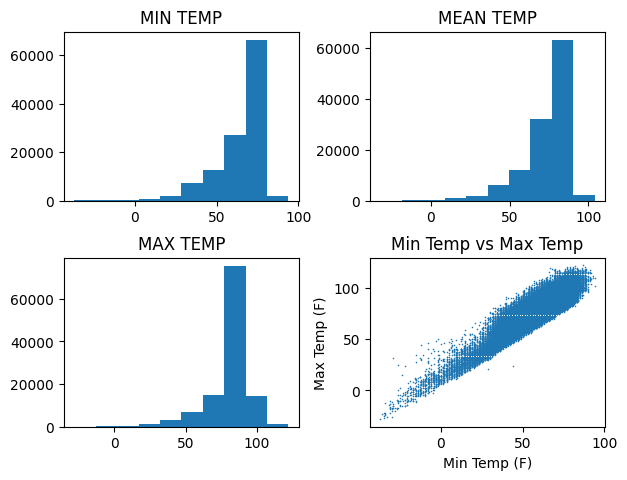

In [433]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = 'yeo-johnson')
X_transformed = data['MIN']

fig, axs = plt.subplots(2,2)
fig.tight_layout(pad=2)
axs[0,0].hist(x = data['MIN'])
axs[0,0].set_title('MIN TEMP')

axs[1,0].hist(x = data['MAX'])
axs[1,0].set_title('MAX TEMP')

axs[0,1].hist(x = data["MEA"])
axs[0,1].set_title('MEAN TEMP')

axs[1,1].plot('MIN', 'MAX', data=data, ls= '', marker = 'x',markersize=.5)
axs[1,1].set_title('Min Temp vs Max Temp')
axs[1,1].set_xlabel('Min Temp (F)')
axs[1,1].set_ylabel('Max Temp (F)')



Seeing these graphs, let's check the skew of these temperatures:

In [434]:
print("The skew of the Min Temps:",data['MIN'].skew())
print("The skew of the Max Temps:",data['MAX'].skew())
print("The skew of the Mean Temps:",data['MEA'].skew())

The skew of the Min Temps: -1.8208393728178607
The skew of the Max Temps: -1.8816785681212058
The skew of the Mean Temps: -2.0268360187039165


As we can see, on these graphs, we are skewed left. Before doing any transformations, let's analyze the correlation between the `MIN` and `MAX` features:

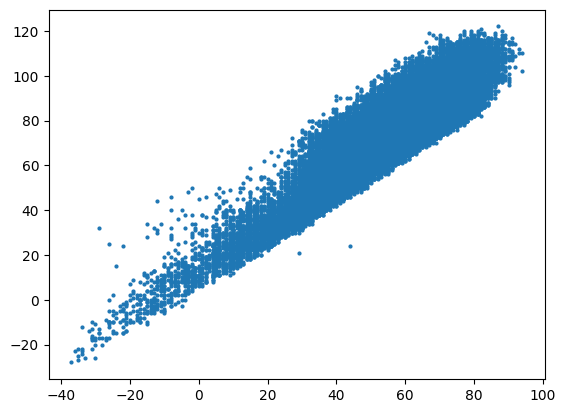

In [435]:
plt.plot(data['MIN'], data['MAX'], ls = '', marker='o', markersize= 2)

In [436]:
print("The correlation coefficient between MIN values and MAX values:", data['MIN'].corr(data['MAX']))


The correlation coefficient between MIN values and MAX values: 0.8737194307713753


As we can see, the correlation coefficent is strong, therefore, we can proceed to regression **without** any transformations!

# 2. Objectives


In this report, we are going to run models to try and predict the `MAX` temperature when given the `MIN`. From our EDA in the `About the Data` section, we are going to not transform the data, since we have a strong correlation coefficient to the data. We will do a train-test split with 5 folds to ensure that we are getting the best models. Also, before running LASSO and Ridge Regression, we are going to StandardScale the values.

Afterwards, we are going to determine which of the models we ran is the most accurate by looking at the `Root Mean Squared Error (RSME)`. This statistic will create a measure for us to analyze which of our models are the best for our situations.

After we determine the best model for predicting the `MAX` temp, we are going to (for fun) create a model that takes in the `Precip` and `MIN` values to see if we can predict the `MAX` temp.

# 3. Linear Regression Models


In [437]:
from sklearn.preprocessing import StandardScaler, Normalizer, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [438]:
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

Firstly, we have to select our X and y, and set up for regression:

In [498]:
# Finding X and y
X = data[['MIN']]
y = data['MAX']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

estimator_lin = Pipeline([('scaler', StandardScaler()), 
                          ('lr', LinearRegression())])

estimator_lasso = Pipeline([('scaler', StandardScaler()), 
                            ('lasso', LassoCV(alphas=np.logspace(-6, 6, 100), cv=kf, random_state=42, max_iter=1000))])

estimator_ridge = Pipeline([('scaler', StandardScaler()), 
                            ('ridge', RidgeCV(alphas=np.logspace(-6, 6, 100), cv=kf))])

Now, we are going to run the models and track the scores, depicting which is better.

In [499]:
scores_lin = []
scores_lasso = []
scores_ridge = []
rmse_lin = []
rmse_lasso = []
rmse_ridge = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    estimator_lin.fit(X_train, y_train)
    y_pred_lin = estimator_lin.predict(X_test)
    scores_lin.append(r2_score(y_test, y_pred_lin))
    rmse_lin.append(rmse(y_test, y_pred_lin))
    
    estimator_lasso.fit(X_train, y_train)
    y_pred_lasso = estimator_lasso.predict(X_test)
    scores_lasso.append(r2_score(y_test, y_pred_lasso))
    rmse_lasso.append(rmse(y_test, y_pred_lasso))
    
    estimator_ridge.fit(X_train, y_train)
    y_pred_ridge = estimator_ridge.predict(X_test)
    scores_ridge.append(r2_score(y_test, y_pred_ridge))
    rmse_ridge.append(rmse(y_test, y_pred_ridge))

print("R^2 scores for Linear Regression:", scores_lin)
print("Average R^2 score for Linear Regression:", np.mean(scores_lin))
print("Average RMSE score for Linear Regression:", np.mean(rmse_lin))

print("\nR^2 scores for LassoCV:", scores_lasso)
print("Average R^2 score for LassoCV:", np.mean(scores_lasso))
print("Average RMSE score for Linear Regression:", np.mean(rmse_lasso))
print(f"Best alpha for LassoCV: {estimator_lasso.named_steps['lasso'].alpha_}")

print("\nR^2 scores for RidgeCV:", scores_ridge)
print("Average R^2 score for RidgeCV:", np.mean(scores_ridge))
print("Average RMSE score for Linear Regression:", np.mean(rmse_ridge))
print(f"Best alpha for RidgeCV: {estimator_ridge.named_steps['ridge'].alpha_}")


R^2 scores for Linear Regression: [0.7647162528369816, 0.7636608098936603, 0.7638174783001559, 0.7660743599366585, 0.7585615240394776]
Average R^2 score for Linear Regression: 0.7633660850013868
Average RMSE score for Linear Regression: 7.233399860395069

R^2 scores for LassoCV: [0.7647162522288342, 0.7636608096245697, 0.763817478818268, 0.7660743597600191, 0.7585615245917818]
Average R^2 score for LassoCV: 0.7633660850046946
Average RMSE score for Linear Regression: 7.23339986039514
Best alpha for LassoCV: 1e-06

R^2 scores for RidgeCV: [0.7647155720974983, 0.7636605059167128, 0.7638184681797271, 0.7660738768832784, 0.7585621334329323]
Average R^2 score for RidgeCV: 0.7633661113020298
Average RMSE score for Linear Regression: 7.233399523608044
Best alpha for RidgeCV: 8.111308307896872


As we can see, all the values are significantly close to one another. `Ridge Regression` has a lower RMSE and a higher R^2 value, therefore, that would be the best regression to be used. <br>
`Note: we can use any of the regressions as they are all very close to one another.`

# 4. Linear Regression Models (BONUS)

Here, we are going to gather our data in order to create a model to predict the `MAX` temperature when given the `MIN and Precip`.
<br>
Remember that earlier, there were `NULL` values in `Precip`, therefore, we need to drop those rows.

In [480]:
data2 = data.copy()

print('The number of null values in Precip', data2['Precip'].isnull().sum())

precip_na = data[data['Precip'].isna()].index.tolist()
data2.drop(index = precip_na, inplace=True)

print('The number of null values in Precip', data2['Precip'].isnull().sum())

The number of null values in Precip 16706
The number of null values in Precip 0


Running analysis on this new data:

In [490]:
X = data2[['MIN','Precip']]
y = data2['MAX']

kf = KFold(shuffle= True, n_splits=5, random_state=42)

alphas=np.logspace(-6,6,100)

estimator_lin = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])
estimator_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', LassoCV(alphas = alphas, cv=kf, max_iter=1000, random_state=42))
])
estimator_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', RidgeCV(alphas = alphas, cv=kf))
])

In [491]:
scores_lin = []
scores_lasso = []
scores_ridge = []
rmse_lin = []
rmse_lasso = []
rmse_ridge = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    estimator_lin.fit(X_train, y_train)
    y_pred_lin = estimator_lin.predict(X_test)
    scores_lin.append(r2_score(y_test, y_pred_lin))
    rmse_lin.append(rmse(y_test, y_pred_lin))
    
    estimator_lasso.fit(X_train, y_train)
    y_pred_lasso = estimator_lasso.predict(X_test)
    scores_lasso.append(r2_score(y_test, y_pred_lasso))
    rmse_lasso.append(rmse(y_test, y_pred_lasso))
    
    estimator_ridge.fit(X_train, y_train)
    y_pred_ridge = estimator_ridge.predict(X_test)
    scores_ridge.append(r2_score(y_test, y_pred_ridge))
    rmse_ridge.append(rmse(y_test, y_pred_ridge))

print("R^2 scores for Linear Regression:", scores_lin)
print("Average R^2 score for Linear Regression:", np.mean(scores_lin))
print("Average RMSE score for Linear Regression:", np.mean(rmse_lin))

print("\nR^2 scores for LassoCV:", scores_lasso)
print("Average R^2 score for LassoCV:", np.mean(scores_lasso))
print("Average RMSE score for Linear Regression:", np.mean(rmse_lasso))
print(f"Best alpha for LassoCV: {estimator_lasso.named_steps['lasso'].alpha_}")

print("\nR^2 scores for RidgeCV:", scores_ridge)
print("Average R^2 score for RidgeCV:", np.mean(scores_ridge))
print("Average RMSE score for Linear Regression:", np.mean(rmse_ridge))
print(f"Best alpha for RidgeCV: {estimator_ridge.named_steps['ridge'].alpha_}")


R^2 scores for Linear Regression: [0.7532194770340483, 0.7561704575178749, 0.7556765423578402, 0.7487752417232655, 0.7408845182357401]
Average R^2 score for Linear Regression: 0.7509452473737538
Average RMSE score for Linear Regression: 7.236968420196673

R^2 scores for LassoCV: [0.75321947807262, 0.756165829053966, 0.7556765410055054, 0.7487752432740039, 0.740884519687266]
Average R^2 score for LassoCV: 0.7509443222186722
Average RMSE score for Linear Regression: 7.236982165265874
Best alpha for LassoCV: 1e-06

R^2 scores for RidgeCV: [0.7532196670179956, 0.7561690297134106, 0.755676165126888, 0.7487757531881548, 0.7408879873817493]
Average R^2 score for RidgeCV: 0.7509457204856396
Average RMSE score for Linear Regression: 7.236962081360623
Best alpha for RidgeCV: 18.738174228603867


We can see that the best model, yet again, is the ridge model. With the same comment as last time, the value difference is very tiny, therefore choosing a model will not **GREATLY** affect the outcome.

# 5. Insights and key findings


Important findings during my EDA consisted of noticing that there were multiple columns with no values in them. Removing them helped clean the data. Another finding was that the `MIN, MAX, and MEA` columns all were skewed to the left. We could have transformed the data to get rid of the skewness, however, as pointed out, the correlation coefficient was high. This brought to our attentions that transforming the data for a linear regression would not be of greatest importance, but could be something to be consider for improving these models.

After running models, we can see that if we want to predict the `MAX` temperature when given the `MIN` values or given both `MIN and Precip` values, the Ridge Regression is the best one to choose. With a mean R^2 score of ~0.7633661 when `MIN` is given and a mean R^2 score of ~0.75094572 when `MIN and Precip` are given, we can see that the precentage of variance explained is decent, but could be higher. Therefore, this model may not have the best prediction, but can give a good ball-park guess. 

It is also good to notice that the model we ran when given `MIN` and `Precip` actually had a smaller R^2 value. Therefore, adding in precipitation increased unexplained variability.

# 6. Next Steps


Next steps for analysis would be to consider the rows that we dropped before running analysis. Would having those null values be the mean value of the set impact our model? Another step would be to consider more variables, or even try adding in polynomial features. This could create a better fit for our model. Also, experimenting with the number of folds and alphas could be beneficial. Trying to optimize the model is a possibility.

Another way of trying to analyze the data would be to use a different time-frame for weather. This data is from WW2, therefore if we chose data from the 2000s or 1800s, the findings may be different.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
